[Reference](https://medium.com/@boyangchen02/time-series-survival-analysis-implementation-in-python-f31c43b3099d)

# Import and Explore Relevant Data

In [2]:
!pip install lifelines

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 349 kB 4.8 MB/s 
     |████████████████████████████████| 68 kB 3.7 MB/s 
     |████████████████████████████████| 38.1 MB 1.4 MB/s 
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4048 sha256=db66917b4a6508c60f535e40b9c9277a94fa3b749e0ce140012258da041f209b
  Stored in directory: /root/.cache/pip/wheels/9f/01/ee/1331593abb5725ff7d8c1333aee93a50a1c29d6ddda9665c9f
Successfully built autograd-gamma
  Attempting uninstall: scipy
    Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from lifelines import KaplanMeierFitter, CoxPHFitter
from lifelines.plotting import plot_lifetimes
%matplotlib inline

In [8]:
data = pd.read_csv("https://raw.githubusercontent.com/bchen022/Machine_Learning_Deep_Learning_Projects/6fe9cc01192cadfe2ecbc79fd5b8e9270a82557c/heart_failure_clinical_records_dataset.csv")
# check datatype and column dtypes, non-null values
data.info()
# check for missing values 
data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

## Correlation heatmap


Text(0.5, 1.0, 'Heart Failure Survival Heatmap')

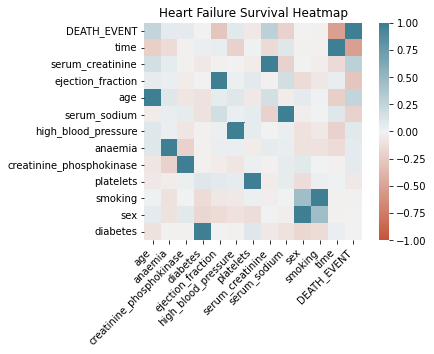

In [9]:
import seaborn as sns
corr = data.corr().sort_values(ascending=False, key=lambda x: abs(x), by="DEATH_EVENT")
ax = sns.heatmap(corr, vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(20, 220, n=200), square=True,)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
ax.set_title("Heart Failure Survival Heatmap")

# Modelling Approaches
- Kaplan-Meier Estimator:
This estimator can be used for simple comparison of survival rates between groups (For instance, survival rates between smokers and non-smokers)
- Cox Proportional Hazard Model:
The Cox Proportional Hazard model can be used to model hazard rates based on multiple features, either categorical or numerical.

# Plotting the Kaplan-Meier Curve

Text(0, 0.5, 'Survival probability')

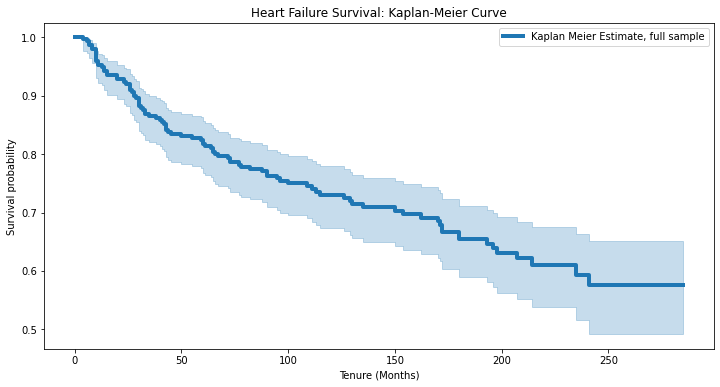

In [10]:
kmf = KaplanMeierFitter()
kmf.fit(data.time, data.DEATH_EVENT, label = 'Kaplan Meier Estimate, full sample')
kmf.plot(linewidth=4, figsize=(12, 6))
plt.title('Heart Failure Survival: Kaplan-Meier Curve')
plt.xlabel('Tenure (Months)')
plt.ylabel('Survival probability')

In [11]:
kmf.survival_function_

,"Kaplan Meier Estimate, full sample"
timeline,
0.0,1.000000
4.0,0.996656
6.0,0.993311
7.0,0.986622
8.0,0.979933
...,...
270.0,0.575705
271.0,0.575705
278.0,0.575705


# Examining Variables

Text(0, 0.5, 'Survival probability')

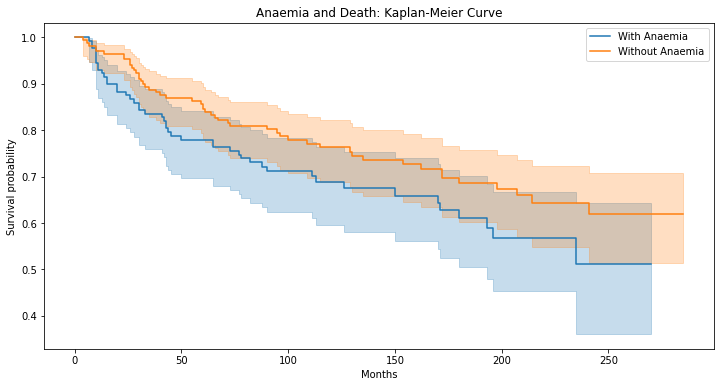

In [12]:
df1 = data[data.anaemia==1]
df2 = data[data.anaemia==0]
kmf.fit(df1.time, df1.DEATH_EVENT)
kmf.plot(label='With Anaemia', figsize=(12, 6))
kmf.fit(df2.time, df2.DEATH_EVENT)
kmf.plot(label='Without Anaemia')
plt.title('Anaemia and Death: Kaplan-Meier Curve')
plt.xlabel('Months')
plt.ylabel('Survival probability')

# Cox Proportional Hazards Model

In [13]:
# Using Cox Proportional Hazards Model
cph = CoxPHFitter()
cph.fit(data, duration_col='time', event_col='DEATH_EVENT')

<lifelines.CoxPHFitter: fitted with 299 total observations, 203 right-censored observations>

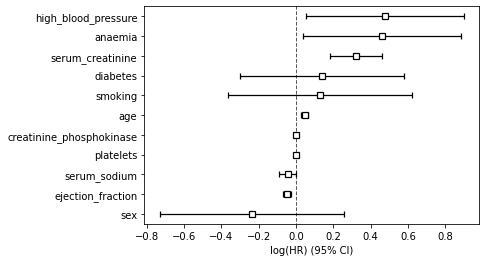

In [14]:
cph.plot()

In [15]:
cph.print_summary(columns=["coef","exp(coef)","exp(coef) lower 95%","exp(coef) upper 95%", "z", "p"], decimals=3)

/usr/local/lib/python3.7/dist-packages/lifelines/utils/printer.py:74: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead
  columns = summary_df.columns & self.columns
/usr/local/lib/python3.7/dist-packages/lifelines/utils/printer.py:61: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead
  columns = summary_df.columns & self.columns


<lifelines.CoxPHFitter: fitted with 299 total observations, 203 right-censored observations>
             duration col = 'time'
                event col = 'DEATH_EVENT'
      baseline estimation = breslow
   number of observations = 299
number of events observed = 96
   partial log-likelihood = -468.228
         time fit was run = 2022-06-06 01:17:23 UTC

---
                           coef  exp(coef)  exp(coef) lower 95%  exp(coef) upper 95%      z       p
covariate                                                                                          
age                       0.046      1.048                1.029                1.067  4.977 <0.0005
anaemia                   0.460      1.584                1.036                2.423  2.122   0.034
creatinine_phosphokinase  0.000      1.000                1.000                1.000  2.226   0.026
diabetes                  0.140      1.150                0.743                1.781  0.627   0.531
ejection_fraction        -0.049      0.952                0.933                0.972 -4.672 <0.0005
high_blood_pressure       0.476      1.609                1.053                2.458  2.201   0.028
platelets                -0.000      1.000                1.000                1.000 -0.412   0.681
serum_creatinine          0.321      1.379                1.201                1.582  4.575 <0.0005
serum_sodium             -0.044      0.957                0.914                1.001 -1.899   0.058
sex                      -0.238      0.789                0.482                1.291 -0.944   0.345
smoking                   0.129      1.138                0.695                1.861  0.513   0.608
---
Concordance = 0.741
Partial AIC = 958.456
log-likelihood ratio test = 81.955 on 11 df
-log2(p) of ll-ratio test = 40.559

# Using a survival model

Text(0.5, 0, 'Time in weeks')

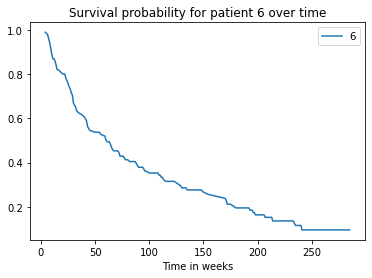

In [16]:
cph.predict_survival_function(data.loc[6]).plot(title="Survival probability for patient 6 over time")
plt.xlabel("Time in weeks")

Text(0.5, 0, 'Time in weeks')

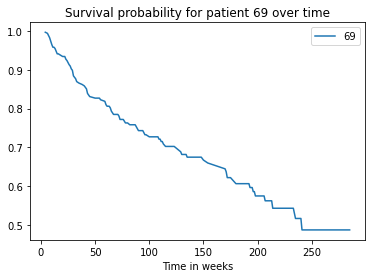

In [17]:
cph.predict_survival_function(data.loc[69]).plot(title="Survival probability for patient 69 over time")
plt.xlabel("Time in weeks")